# Model 49 - (XGBOOST - some in kernels)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import os
%matplotlib inline

In [2]:
fi = pd.DataFrame()
types = ['1JHC', '1JHN', '2JHC', '2JHN', '2JHH', '3JHC', '3JHN', '3JHH']
for t in types:
    for f in os.listdir(f'../type_results/{t}'):
        if 'fi' in f and 'M049' in f:
            print(f)
            df = pd.read_parquet(f'../type_results/{t}/{f}')
            fi = pd.concat([fi, df])

M049_0721_0839_1JHC_fi_0.4534MAE_-0.791LMAE_xgboost_3folds_500000iter_0.05lr.parquet
M049_0721_1746_1JHN_fi_0.2571MAE_-1.358LMAE_xgboost_3folds_500000iter_0.01lr.parquet
M049_0719_2005_1JHN_fi_0.2565MAE_-1.361LMAE_xgboost_3folds_100000iter_0.005lr.parquet
M049_0719_1907_1JHN_fi_0.2566MAE_-1.36LMAE_xgboost_3folds_100000iter_0.01lr.parquet
M049_0721_0838_2JHC_fi_0.1785MAE_-1.723LMAE_xgboost_3folds_500000iter_0.05lr.parquet
M049_0720_0044_2JHN_fi_0.1204MAE_-2.117LMAE_xgboost_3folds_50000iter_0.01lr.parquet
M049_0719_1817_2JHH_fi_0.1159MAE_-2.155LMAE_xgboost_3folds_100000iter_0.1lr.parquet
M049_0719_1622_3JHN_fi_0.1158MAE_-2.156LMAE_xgboost_3folds_10000iter_0.1lr.parquet
M049_0721_0839_3JHH_fi_0.1227MAE_-2.098LMAE_xgboost_3folds_500000iter_0.05lr.parquet


In [3]:
use_feats = pd.DataFrame()
for i, d in fi.groupby('type'):
    print(i)
    d2 = d.groupby('feature')[['importance']].max()
    use_feats[i] = d2['importance'] > 0.001

1JHC
1JHN
2JHC
2JHH
2JHN
3JHH
3JHN


In [4]:
# use_feats.to_csv('../fi/Good_Features_By_Type.csv')

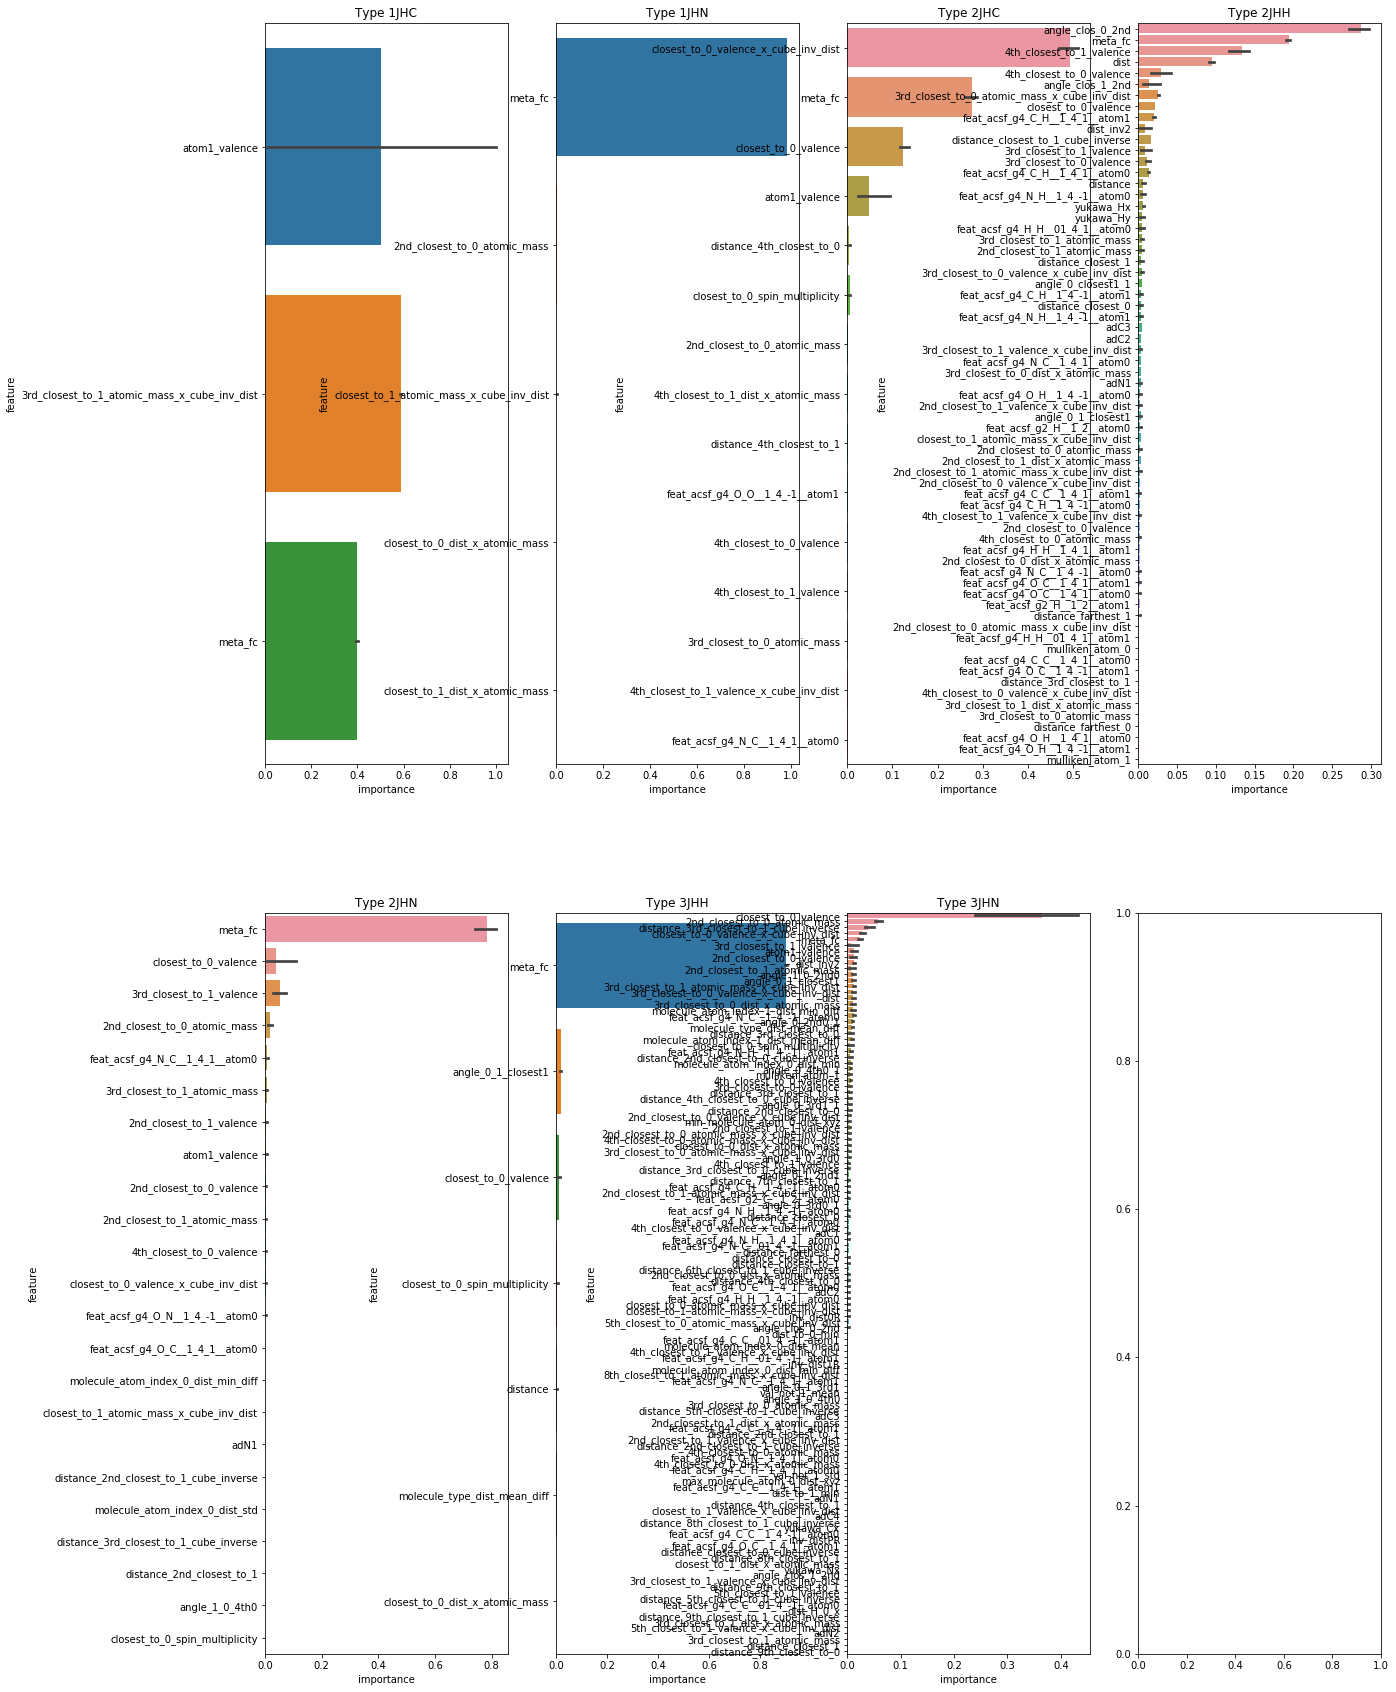

In [5]:
fig, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(2, 4, figsize=(20, 30))
axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]
ax_idx = 0
for t in use_feats.columns.tolist():
    fi_t = fi.loc[fi['type'] == t]
    fi_t = fi_t.loc[fi_t['importance'] >= 0.001]
    #plt.figure(figsize=(12, 20))
    sns.barplot(x='importance',
                y='feature',
                data=fi_t.sort_values('importance',
                                    ascending=False),
               ax=axes[ax_idx])
    axes[ax_idx].set_title(f'Type {t}')
    ax_idx += 1
plt.show()

# Meta Feature Importance

In [7]:
fi_meta = pd.DataFrame()
types = ['1JHC', '1JHN', '2JHC', '2JHN', '2JHH', '3JHC', '3JHN', '3JHH']
for t in types:
    for f in os.listdir(f'../type_results/{t}/meta/'):
        if 'fi' in f and 'M049' in f:
            print(f)
            df = pd.read_parquet(f'../type_results/{t}/meta/{f}')
            fi_meta = pd.concat([fi_meta, df])

M049_0721_0839_1JHC_fi_meta_fc_f1_0.6459MAE_-0.4371LMAE.parquet
M049_0721_0839_1JHC_fi_meta_fc_f2_0.6452MAE_-0.4382LMAE.parquet
M049_0721_0839_1JHC_fi_meta_fc_f3_0.6458MAE_-0.4373LMAE.parquet
M049_0719_2005_1JHN_fi_meta_fc_f2_0.3722MAE_-0.9884LMAE.parquet
M049_0719_1907_1JHN_fi_meta_fc_f3_0.3690MAE_-0.9969LMAE.parquet
M049_0719_1907_1JHN_fi_meta_fc_f2_0.3725MAE_-0.9876LMAE.parquet
M049_0719_2005_1JHN_fi_meta_fc_f1_0.3701MAE_-0.9940LMAE.parquet
M049_0721_1746_1JHN_fi_meta_fc_f2_0.3739MAE_-0.9837LMAE.parquet
M049_0721_1746_1JHN_fi_meta_fc_f3_0.3711MAE_-0.9913LMAE.parquet
M049_0719_2005_1JHN_fi_meta_fc_f3_0.3692MAE_-0.9965LMAE.parquet
M049_0721_1746_1JHN_fi_meta_fc_f1_0.3722MAE_-0.9884LMAE.parquet
M049_0719_1907_1JHN_fi_meta_fc_f1_0.3712MAE_-0.9910LMAE.parquet
M049_0721_0838_2JHC_fi_meta_fc_f1_0.2629MAE_-1.3361LMAE.parquet
M049_0721_0838_2JHC_fi_meta_fc_f2_0.2617MAE_-1.3404LMAE.parquet
M049_0721_0838_2JHC_fi_meta_fc_f3_0.2642MAE_-1.3311LMAE.parquet
M049_0720_0044_2JHN_fi_meta_fc_f2_0.1912

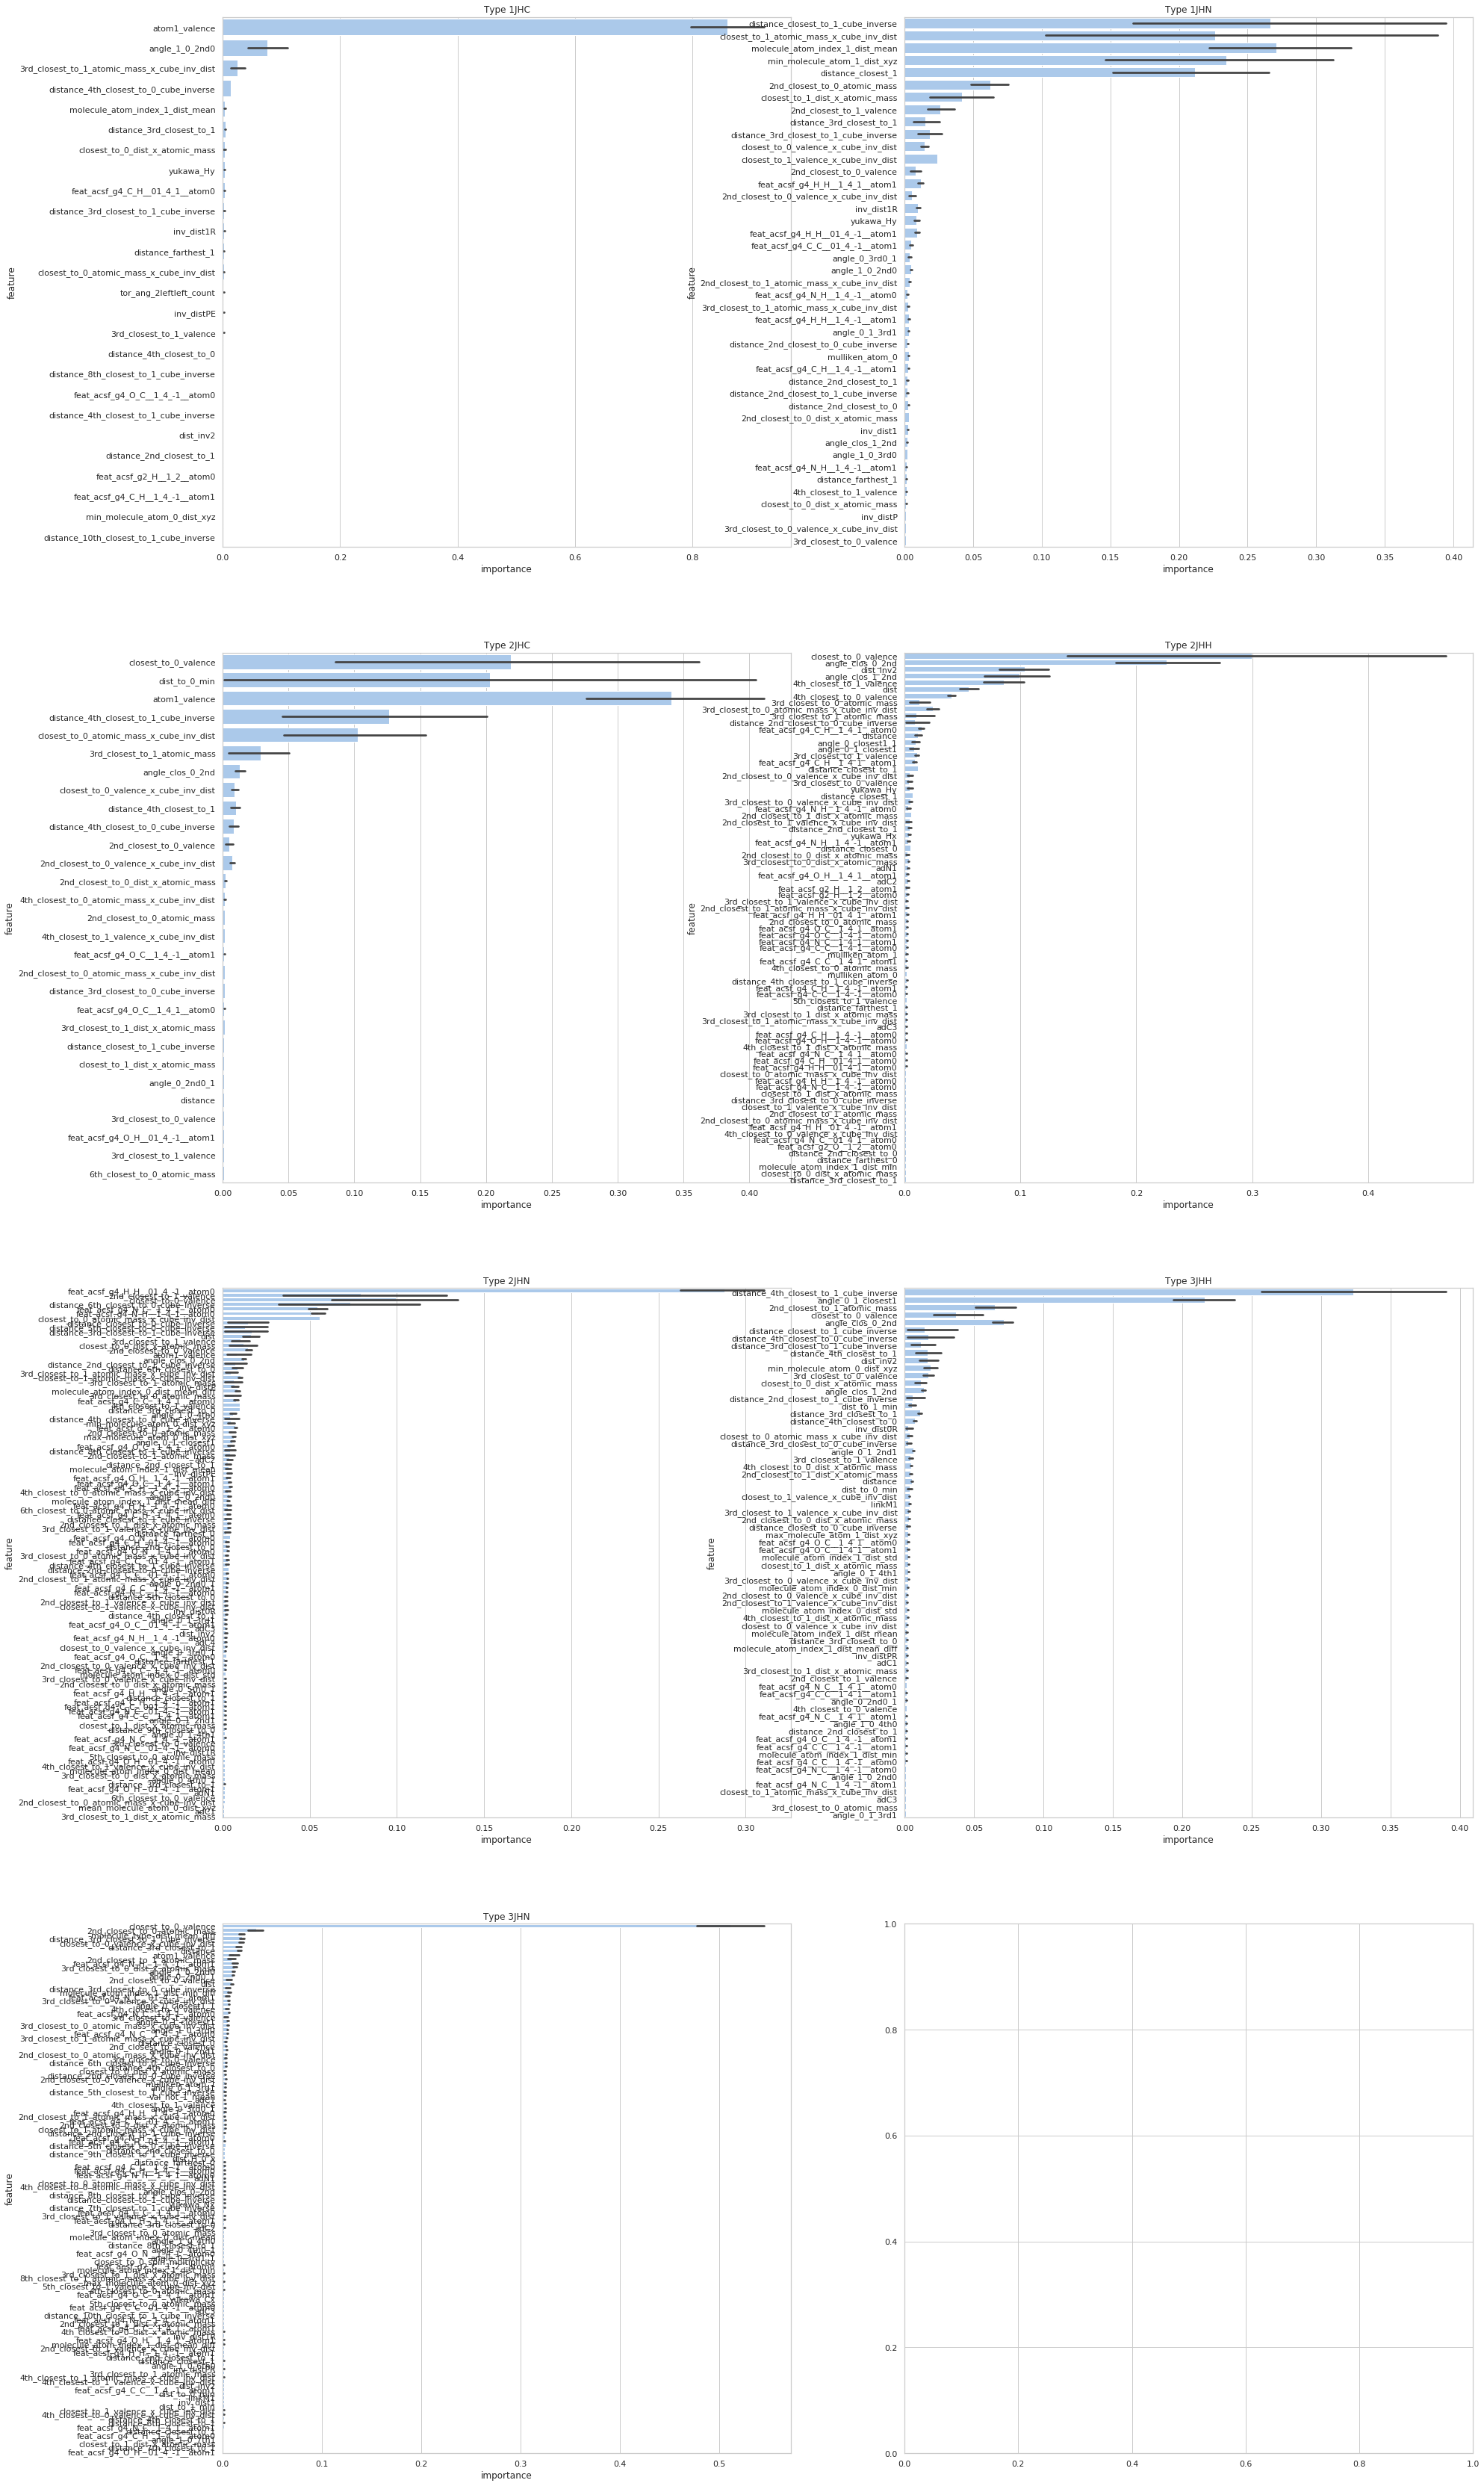

In [8]:
sns.set(style="whitegrid")
sns.set_color_codes("pastel")

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, figsize=(30, 60))
axes = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]
ax_idx = 0
for t in use_feats.columns.tolist():
    fi_t = fi_meta.loc[fi_meta['type'] == t]
    fi_t = fi_t.loc[fi_t['importance'] >= 0.001]
    #plt.figure(figsize=(12, 20))
    sns.barplot(x='importance',
                y='feature',
                data=fi_t.sort_values('importance',
                                    ascending=False),
                color="b",
                ax=axes[ax_idx])
    axes[ax_idx].set_title(f'Type {t}')
    ax_idx += 1
plt.show()

In [45]:
use_feats_meta = pd.DataFrame()
for i, d in fi_meta.groupby('type'):
    print(i)
    d2 = d.groupby('feature')[['importance']].max()
    use_feats_meta[i] = d2['importance'] >= d['importance'].mean() - 0.001

1JHC
1JHN
2JHC
2JHH
2JHN
3JHH
3JHN


In [46]:
use_feats_meta.sum()

1JHC    19.0
1JHN    39.0
2JHC    17.0
2JHH    60.0
2JHN    91.0
3JHH    54.0
3JHN    83.0
dtype: float64

In [47]:
use_feats_meta.tail()

,1JHC,1JHN,2JHC,2JHH,2JHN,3JHH,3JHN
feature,,,,,,,
yukawa_Hx,False,False,False,True,False,False,False
yukawa_Hy,True,True,False,True,False,False,False
yukawa_Nx,False,False,False,False,False,False,True
yukawa_Ox,False,False,False,False,False,False,False
zpve,False,False,False,False,False,False,False


In [48]:
use_feats_meta.shape

(389, 7)

In [49]:
use_feats.sum()

1JHC      3.0
1JHN      5.0
2JHC     15.0
2JHH     67.0
2JHN     23.0
3JHH      7.0
3JHN    126.0
dtype: float64

In [50]:
use_feats_meta.loc[use_feats_meta['3JHN'] == True].index.tolist()

['2nd_closest_to_0_atomic_mass',
 '2nd_closest_to_0_atomic_mass_x_cube_inv_dist',
 '2nd_closest_to_0_dist_x_atomic_mass',
 '2nd_closest_to_0_valence',
 '2nd_closest_to_0_valence_x_cube_inv_dist',
 '2nd_closest_to_1_atomic_mass',
 '2nd_closest_to_1_atomic_mass_x_cube_inv_dist',
 '2nd_closest_to_1_valence',
 '3rd_closest_to_0_atomic_mass',
 '3rd_closest_to_0_atomic_mass_x_cube_inv_dist',
 '3rd_closest_to_0_dist_x_atomic_mass',
 '3rd_closest_to_0_valence',
 '3rd_closest_to_0_valence_x_cube_inv_dist',
 '3rd_closest_to_1_atomic_mass_x_cube_inv_dist',
 '3rd_closest_to_1_valence',
 '3rd_closest_to_1_valence_x_cube_inv_dist',
 '4th_closest_to_0_atomic_mass_x_cube_inv_dist',
 '4th_closest_to_0_valence',
 '4th_closest_to_1_valence',
 'adC1',
 'adC2',
 'adN1',
 'angle_0_1_2nd1',
 'angle_0_1_3rd1',
 'angle_0_1_closest1',
 'angle_0_2nd0_1',
 'angle_0_3rd0_1',
 'angle_0_3rd1_1',
 'angle_0_4th0_1',
 'angle_0_closest1_1',
 'angle_1_0_2nd0',
 'angle_1_0_3rd0',
 'angle_1_0_4th0',
 'angle_clos_0_2nd',
 '

In [51]:
use_feats_meta.to_csv('../fi/FI_ANALYSIS_M049_GOODFEATS.csv')

In [53]:
import collections
print([item for item, count in collections.Counter(mylist).items() if count > 1])


['dist', 'dist_H_0_x', 'distance_closest_0', 'distance_farthest_0', 'molecule_atom_index_0_dist_mean', 'molecule_atom_index_1_dist_min_diff', 'molecule_type_dist_mean_diff', 'mulliken_atom_1']
